## Step 1: Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Reading the data

df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [6]:
#  Renaming the columns (Replacing multiple spaces with one)

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  

print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


## Data cleaning

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness 1-19 years                 1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [9]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(col)

Life expectancy
Adult Mortality
Alcohol
Hepatitis B
BMI
Polio
Total expenditure
Diphtheria
GDP
Population
thinness 1-19 years
thinness 5-9 years
Income composition of resources
Schooling


In [10]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
# Removing null rows from target variable

df1 = df.dropna(subset=['Life expectancy'])

In [12]:
print("Rows before:", len(df))
print("Rows after:", len(df1))
print("Remaining nulls in Life expectancy:", df1['Life expectancy'].isnull().sum())

Rows before: 2938
Rows after: 2928
Remaining nulls in Life expectancy: 0


In [13]:
# Dropping the column ppopulation as it as major missing value 22.2% 
df1 = df1.drop(columns=['Population'])

In [14]:
print(df1.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [15]:
# For numerical features with continous values: Impute with median (less sensitive to outliers)

num_cols_cont = ['Adult Mortality', 'Alcohol', 'BMI', 'Total expenditure','GDP',
             'thinness 1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']

df1[num_cols_cont] = df1[num_cols_cont].fillna(df1[num_cols_cont].median())

In [16]:
# For numerical features with continous values: Impute with median (less sensitive to outliers)

num_cols_disc = ['Hepatitis B', 'Polio', 'Diphtheria']

df1[num_cols_disc] = df1[num_cols_disc].fillna(df1[num_cols_disc].mode().iloc[0])

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                            0
Year                               0
Status                             0
Life expectancy   

array([[<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'Hepatitis B'}>, <Axes: >]], dtype=object)

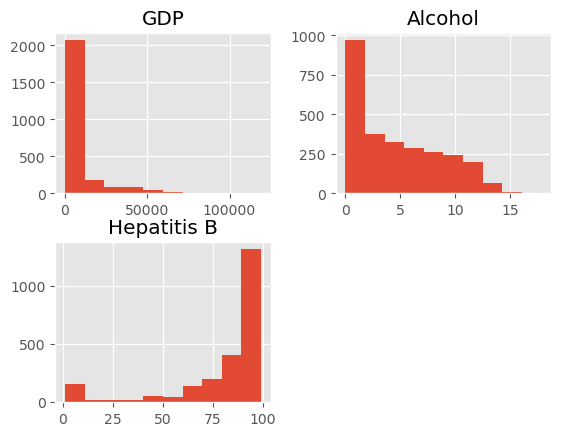

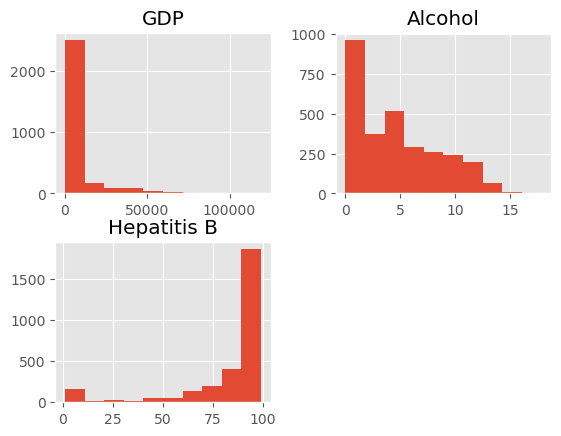

In [17]:
# Checking the data before and after the imputation of null values

print(df.isnull().sum())
df[['GDP', 'Alcohol', 'Hepatitis B']].hist()


print(df1.isnull().sum())
df1[['GDP', 'Alcohol', 'Hepatitis B']].hist()

In [18]:
# Removing Duplicates (If Any)

df1 = df1.drop_duplicates()

## Outliers

In [19]:
numeric_columns = df1.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

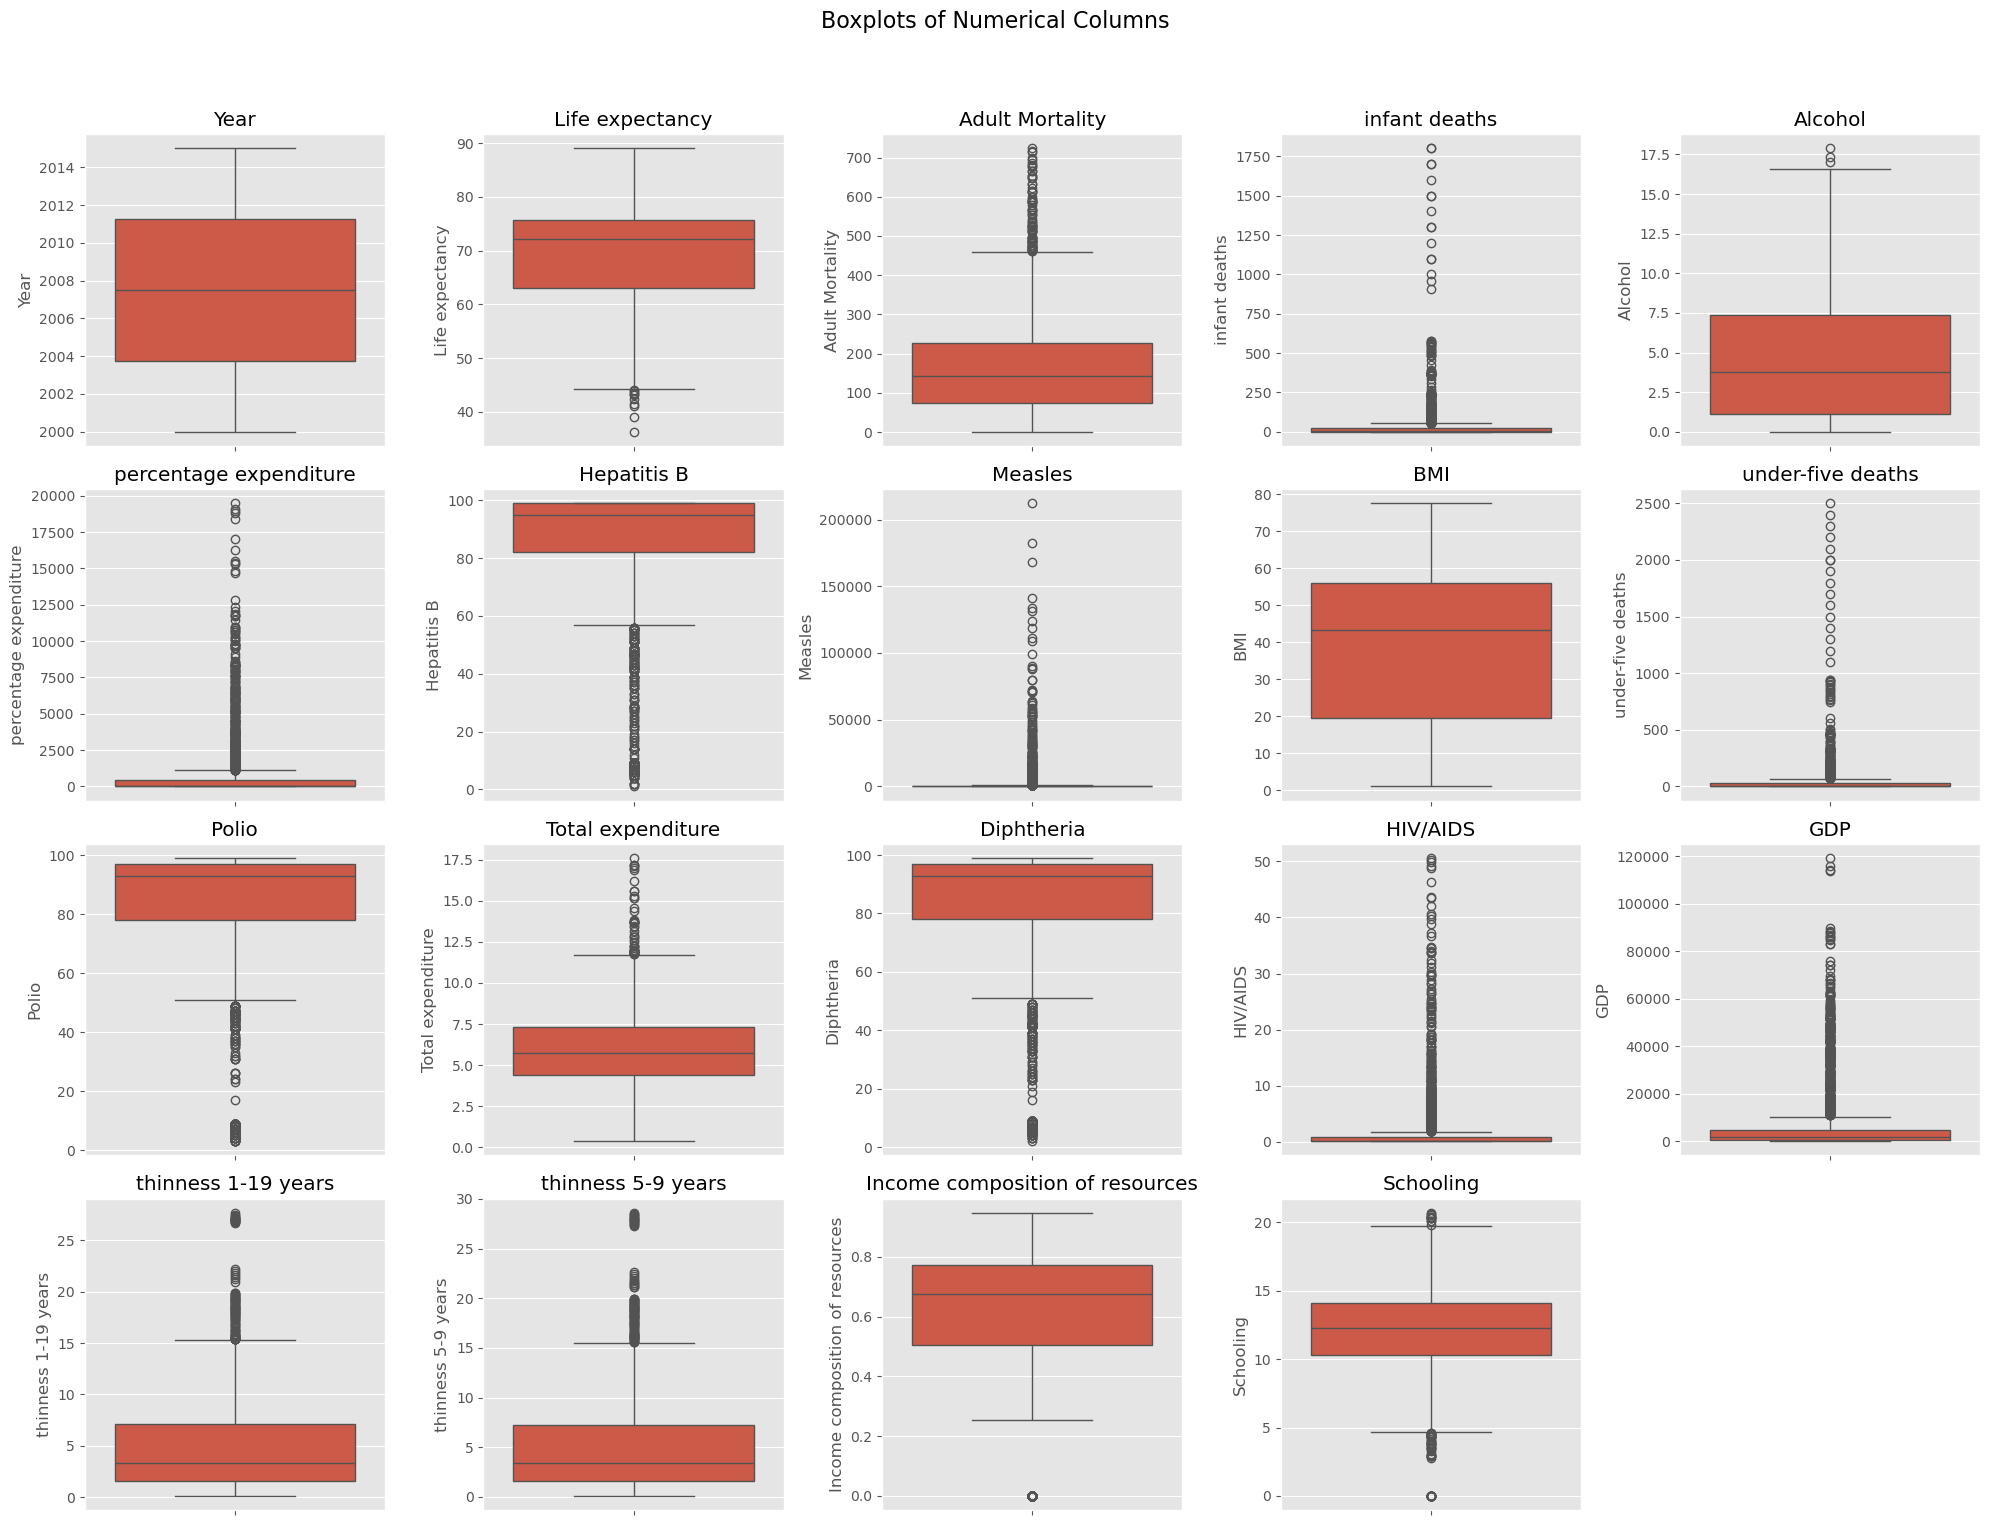

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df1[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
outlier_cols = [
'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure','Hepatitis B', 'Measles', 'BMI', 'under-five deaths','Polio','Total expenditure'
,'Diphtheria', 'HIV/AIDS', 'GDP','thinness 1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']

In [22]:
# Performing outlier handling for each specified column

for col_name in outlier_cols:
    
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
# The lower and upper bounds for outliers

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

# Replace outliers with the mean value of the column

    df1[col_name] = np.where((df1[col_name] > upper_bound) | (df1[col_name] < lower_bound),
                            np.mean(df1[col_name]),
                            df1[col_name])

In [23]:
df1.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       153.848125      11.035979   
std       4.61056         9.523867       104.343963      14.322660   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       218.000000      22.000000   
max    2015.00000        89.000000       459.000000      55.000000   

           Alcohol  percentage expenditure  Hepatitis B      Measles  \
count  2928.000000             2928.000000  2928.000000  2928.000000   
mean      4.546020              237.325985    90.732736   517.248594   
std       3.898916              299.534991     9.564010   924.106200   
min       0.010000                0.000000    57.000000     0.000000   
25%       1.107500                4.853964    84.367828     0.000000   
50%       3.770000               65.611455    95.000000    17.000000   
75%       7.390000              442.614322    99.000000   362.250000   
max      16.580000             1099.248837    99.000000  2427.855874   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2928.000000        2928.000000  2928.000000        2928.000000   
mean     38.291291          14.283690    88.537263           5.788059   
std      19.857308          18.350097    10.918805           2.154131   
min       1.000000           0.000000    51.000000           0.370000   
25%      19.400000           0.000000    82.655055           4.370000   
50%      43.350000           4.000000    93.000000           5.750000   
75%      56.100000          28.000000    97.000000           7.150000   
max      77.600000          70.000000    99.000000          11.710000   

        Diphtheria     HIV/AIDS          GDP  thinness 1-19 years  \
count  2928.000000  2928.000000  2928.000000          2928.000000   
mean     88.674728     0.518770  2771.689819             4.339641   
std      10.467099     0.658522  2557.210221             3.386968   
min      51.000000     0.100000     1.681350             0.100000   
25%      82.429645     0.100000   578.797095             1.600000   
50%      93.000000     0.100000  1764.973870             3.300000   
75%      97.000000     0.800000  4793.630903             6.625000   
max      99.000000     1.800000  9985.369590            15.300000   

       thinness 5-9 years  Income composition of resources    Schooling  
count         2928.000000                      2928.000000  2928.000000  
mean             4.355587                         0.658105    12.186545  
std              3.417421                         0.154232     2.853805  
min              0.100000                         0.253000     4.700000  
25%              1.600000                         0.554000    10.500000  
50%              3.400000                         0.677000    12.300000  
75%              6.700000                         0.773000    14.100000  
max             15.500000                         0.948000    19.700000

In [24]:
df1.shape

(2928, 21)

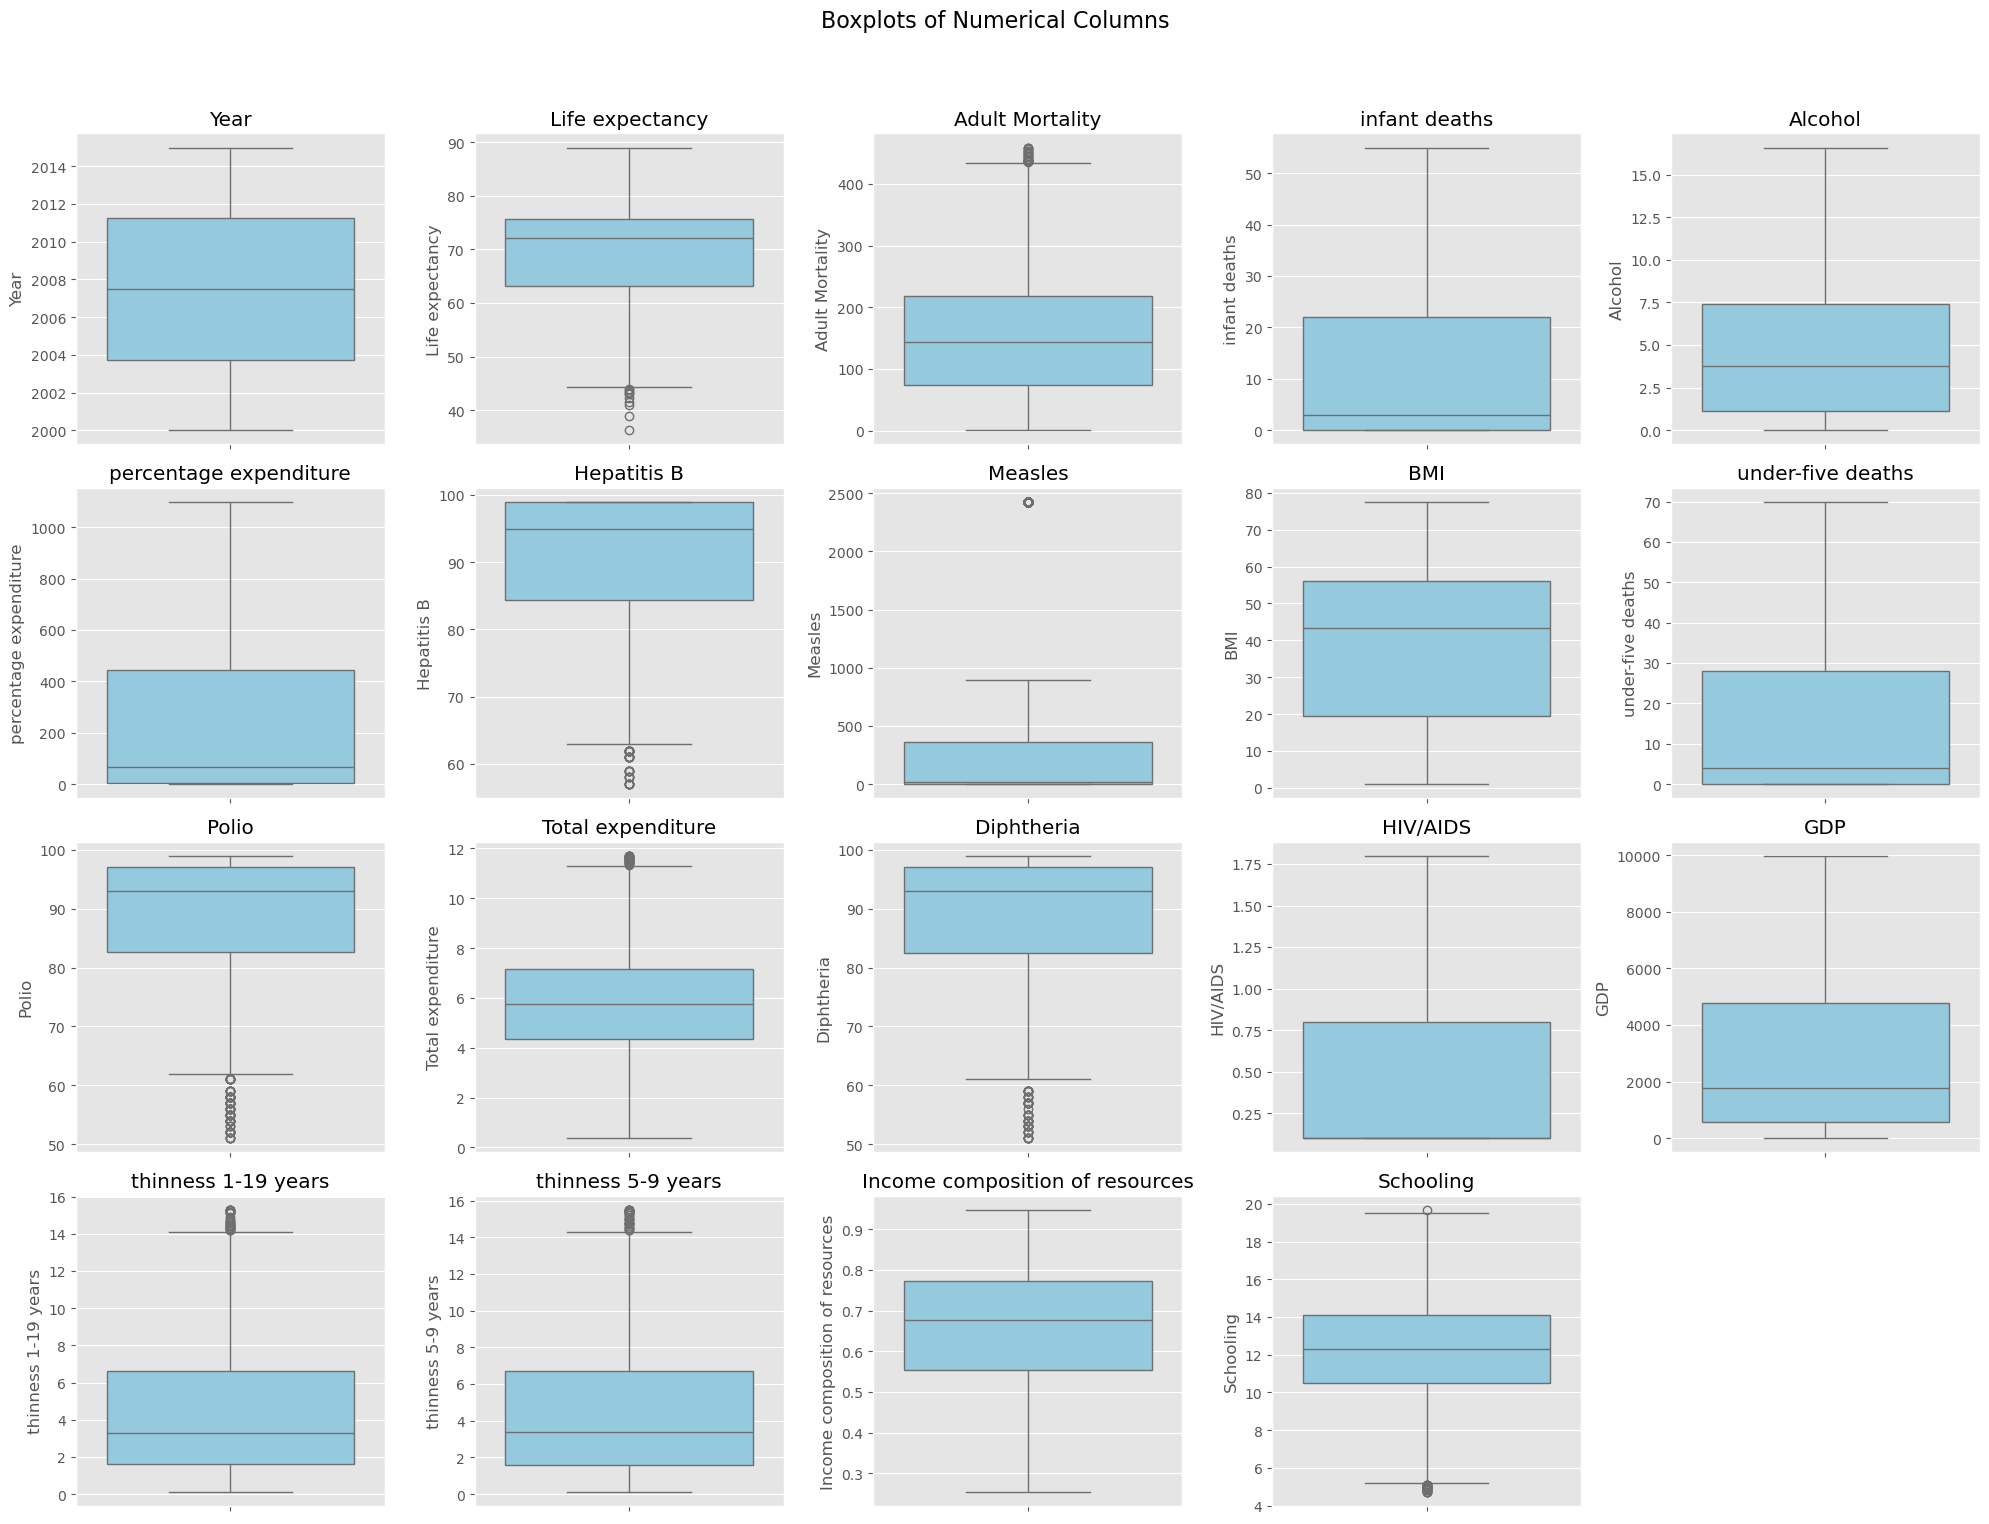

In [25]:
# Select only numerical columns

numeric_columns = df1.select_dtypes(include=['float64','int64']).columns

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df1[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## EDA (Exploratory Data Analysis)

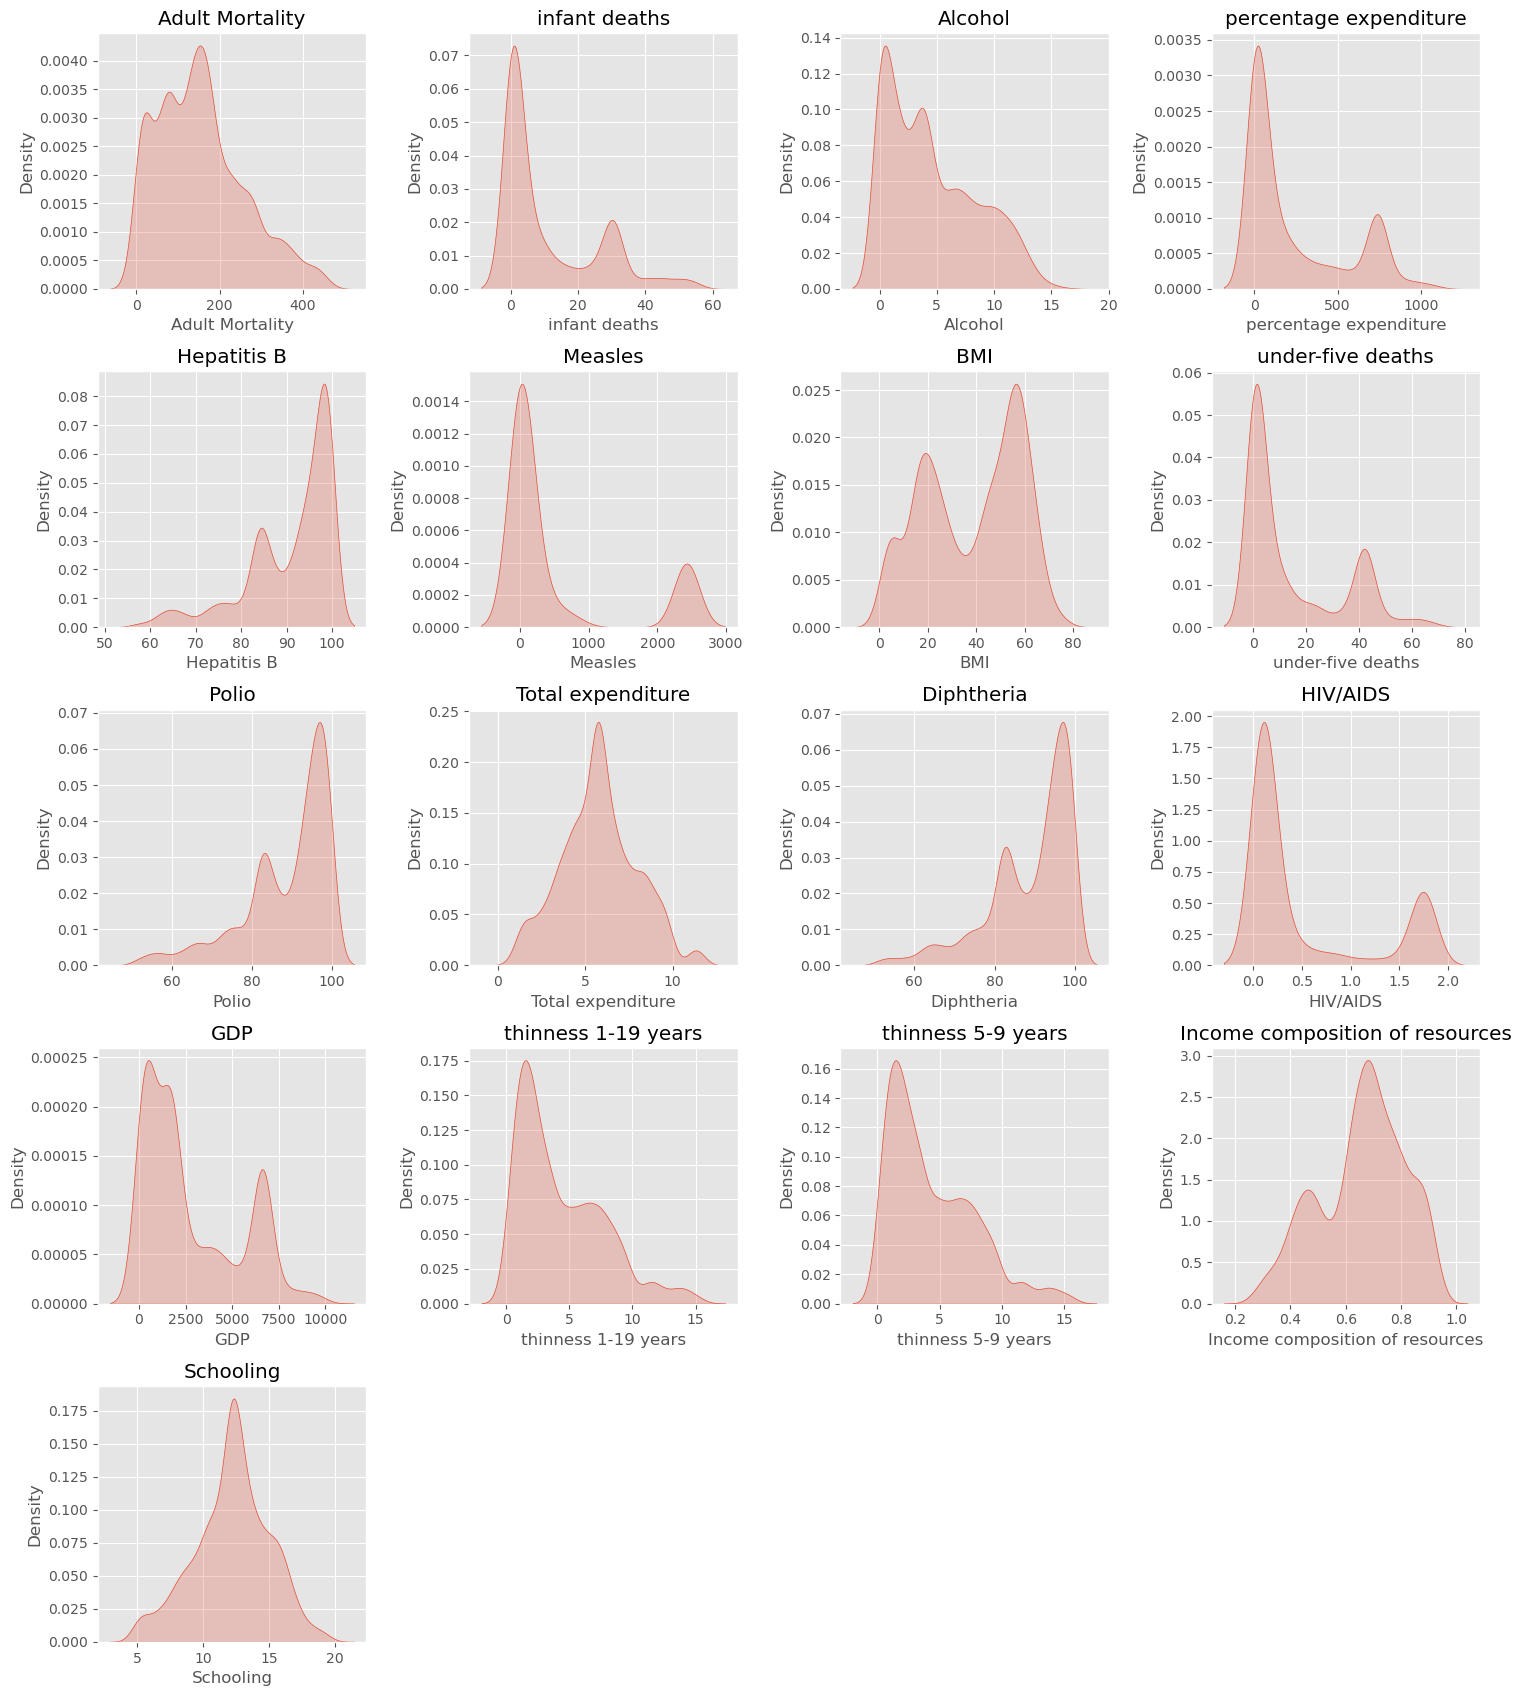

In [26]:
# List of numerical columns (excluding Year and categoricals)
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns.drop(['Year', 'Life expectancy'])

# Plot KDE for each column
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)
    sns.kdeplot(df1[col], fill=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

#### Target Variable Analysis (Life expectancy)

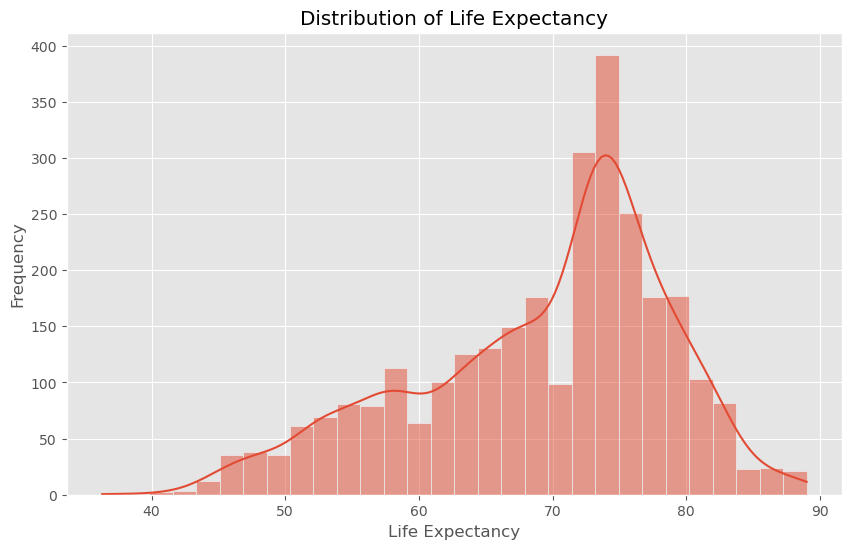

In [27]:
# Distribution of life expectancy

plt.figure(figsize=(10, 6))
sns.histplot(df1['Life expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

#### Observation
> It shows that the distribution of Life Expectancy have mean around 70 and meadian around 75 

Text(0.5, 1.0, 'Life Expectancy by Country Status')

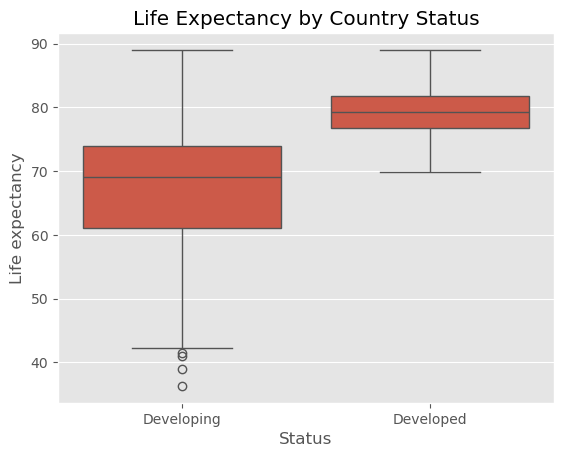

In [28]:
# Boxplot by 'Status'

sns.boxplot(x='Status', y='Life expectancy', data=df1)
plt.title("Life Expectancy by Country Status")

#### Observation
> The data reveals a significant disparity in average life expectancy between developed and developing countries
>  Developed countries exhibit significantly higher life expectancy compared to developing nations.

#### To improve overall life expectancy, we should focus more on developing countries through targeted healthcare investment and economic initiatives to push them toward becoming developed nations.

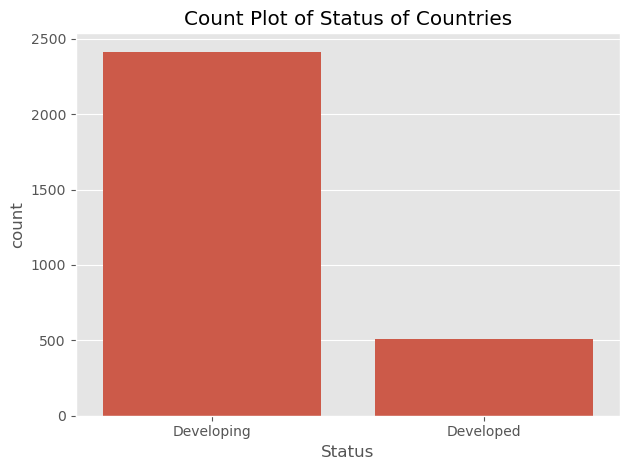

In [29]:
sns.countplot(x=df1['Status'])  
plt.title('Count Plot of Status of Countries')  
plt.tight_layout()  
plt.show()  

<Axes: xlabel='Status', ylabel='Life expectancy'>

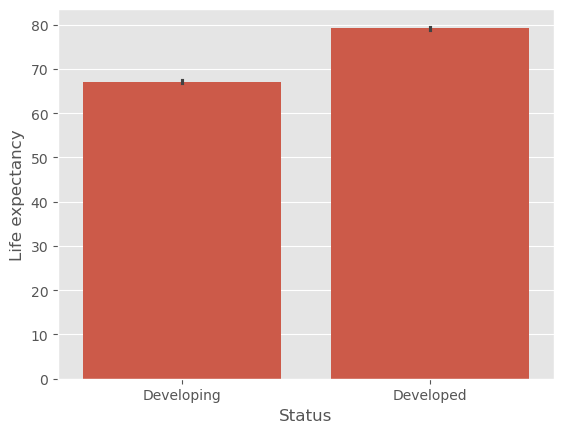

In [30]:
sns.barplot(x='Status', y='Life expectancy', data=df1, estimator=np.mean)

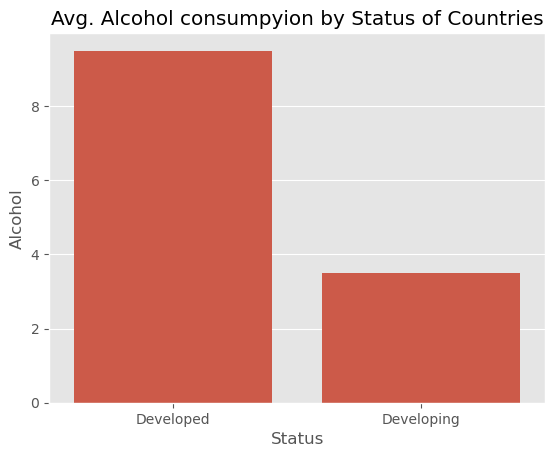

In [31]:
data = df1.groupby('Status')['Alcohol'].mean().reset_index()

sns.barplot(data = data, x= 'Status', y= 'Alcohol')
plt.title('Avg. Alcohol consumpyion by Status of Countries')
plt.show()

Text(0.5, 1.0, 'Life Expectancy Trend Over Time')

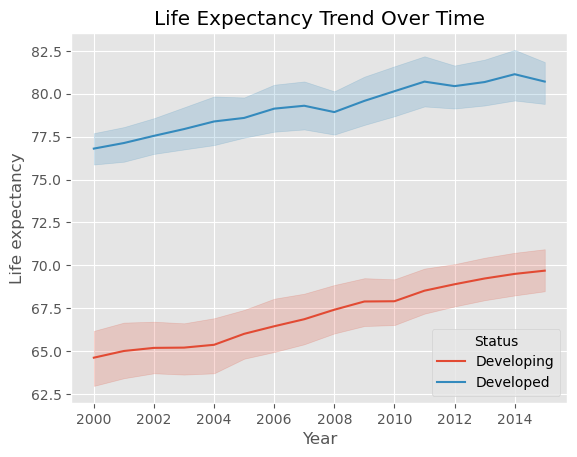

In [32]:
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=df)
plt.title("Life Expectancy Trend Over Time")

#### Observation
> The line plot shows life expectancy trends (2000–2014) for developed and developing countries, and it increases over time for both groups at the same rate

<Axes: title={'center': 'Top 10 Countries by Life Expectancy'}, xlabel='Country'>

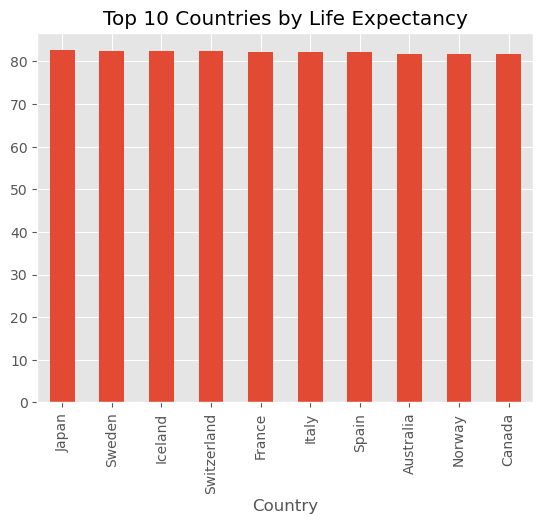

In [33]:
top10 = df1.groupby('Country')['Life expectancy'].mean().nlargest(10)
bottom10 = df1.groupby('Country')['Life expectancy'].mean().nsmallest(10)

top10.plot(kind='bar', title="Top 10 Countries by Life Expectancy")

# bottom10.plot(kind='bar', title="Bottom 10 Countries by Life Expectancy")

In [34]:
bottom10

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life expectancy, dtype: float64

#### Observation
> The top 10 countries with the highest life expectancy (averaging 81.7–82.5 years) are all developed nations, led by: Japan (82.54 years),Sweden (82.52 years),Iceland (82.44 years) followed by Switzerland, France, Italy, Spain, Australia, Norway, and Canada.

#### If all nations matched Japan’s life expectancy, global averages would rise by ~5 years. Prioritizing preventive care and equitable healthcare access could close 50% of this gap.

<Axes: title={'center': 'Bottom 10 Countries by Life Expectancy'}, xlabel='Country'>

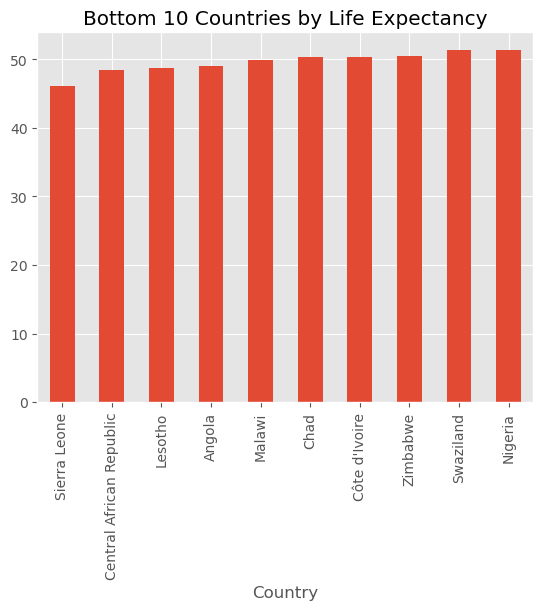

In [35]:
bottom10.plot(kind='bar', title="Bottom 10 Countries by Life Expectancy")

#### Observation
> The bottom 10 countries for life expectancy (averaging 46.1–51.4 years) are all low-income African nations, with: Sierra Leone (46.1 years) at the lowest, Central African Republic (48.5 years), Lesotho (48.8 years), followed by Angola, Malawi, Chad, Côte d’Ivoire, Zimbabwe, Swaziland (Eswatini), and Nigeria.

#### If the bottom 10 nations matched Rwanda’s progress (+10 years in 20 years), 50M+ lives could be saved per decade. This requires $10–20B/year in targeted health aid

#### The difference between the top 10 (82.5 years) and bottom 10 (46–51 years) is ~33 years—equivalent to multiple generations of lost lifespan

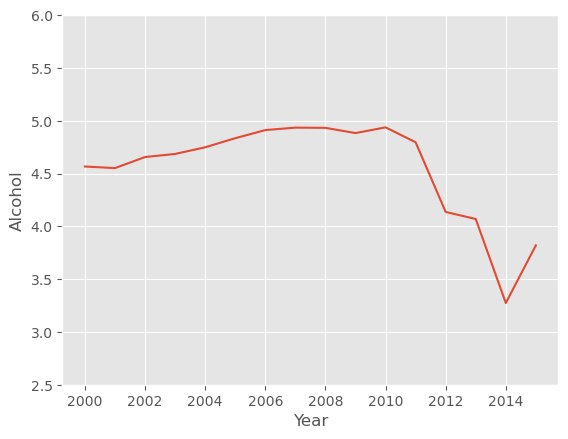

In [36]:
Avg_alcohol_consumption = df1.groupby('Year')['Alcohol'].mean().reset_index()

sns.lineplot(data= Avg_alcohol_consumption, x= 'Year', y= 'Alcohol')
plt.ylim(bottom=2.5, top=6)
plt.show()

In [37]:
def plot_line_and_scatter(x_vars):

    for x in x_vars:
        # Create a figure with two side-by-side subplots
        fig, (ax1, ax2) = plt.subplots(
            nrows=1, 
            ncols=2, 
            figsize=(12,5)
        )
        
        # Line plot
        sns.lineplot(data=df1, x=x, y='Life expectancy', ax=ax1, color='blue')
        ax1.set_title(f'{x} vs Life expectancy')
        
        # Scatter plot
        sns.scatterplot(data=df1, x=x, y='Life expectancy',hue='Status', ax=ax2, color='red')
        ax2.set_title(f'{x} vs Life expectancy')
        
        plt.tight_layout()
        plt.show()

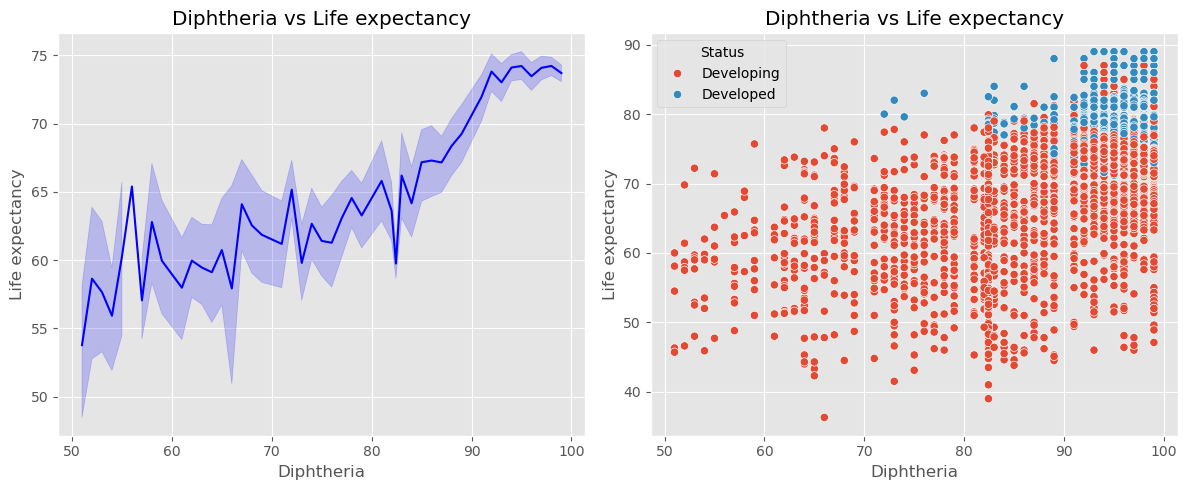

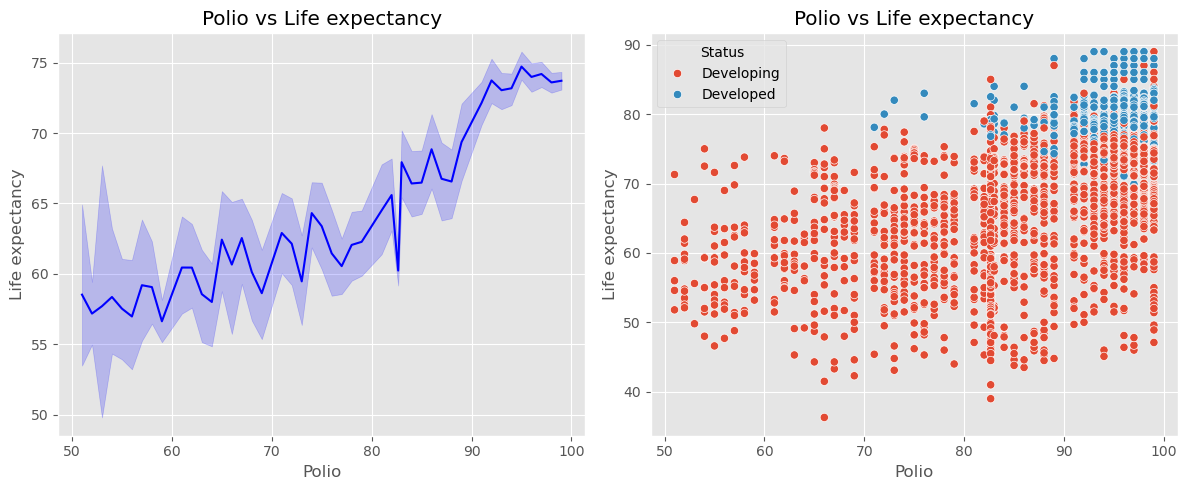

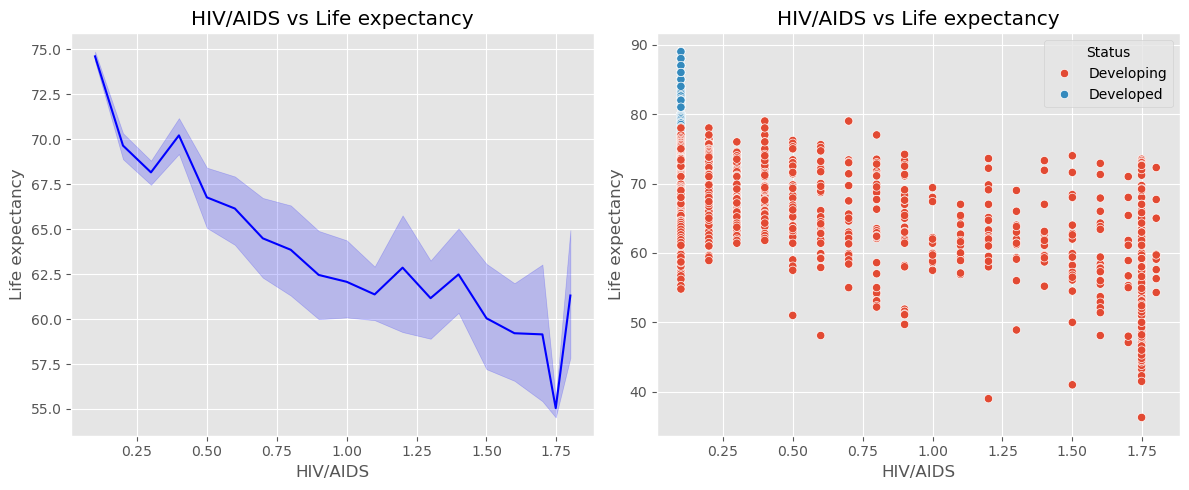

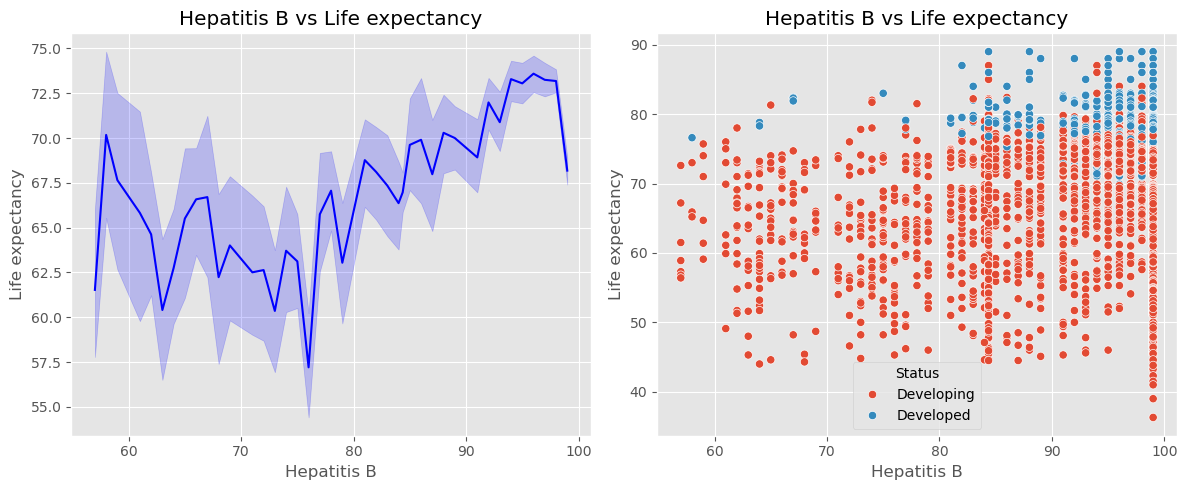

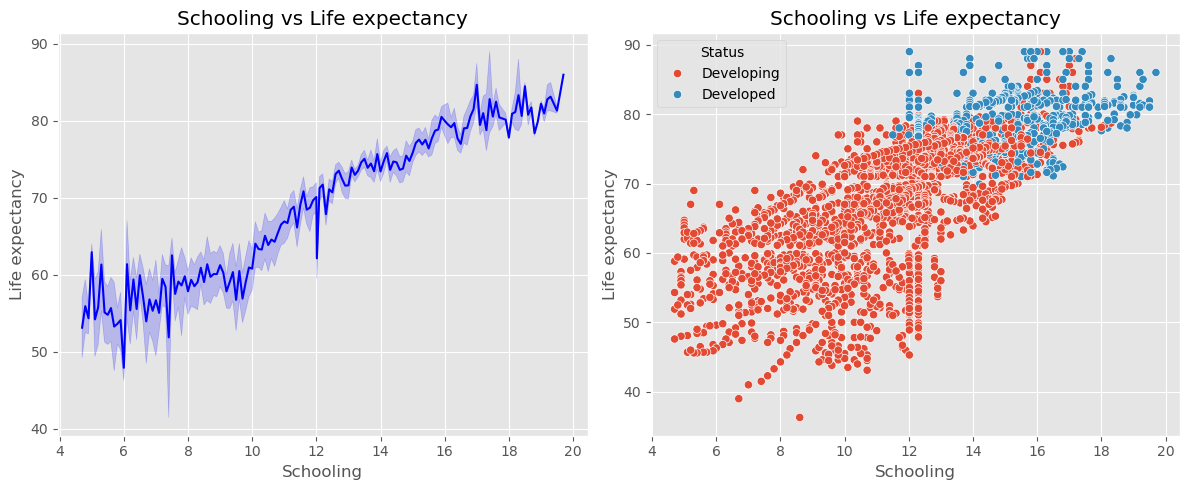

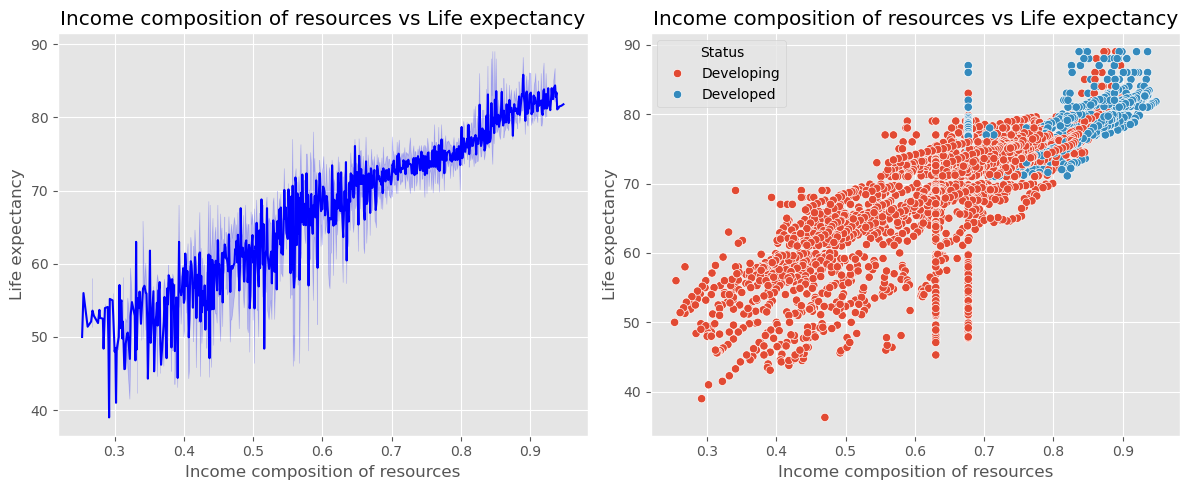

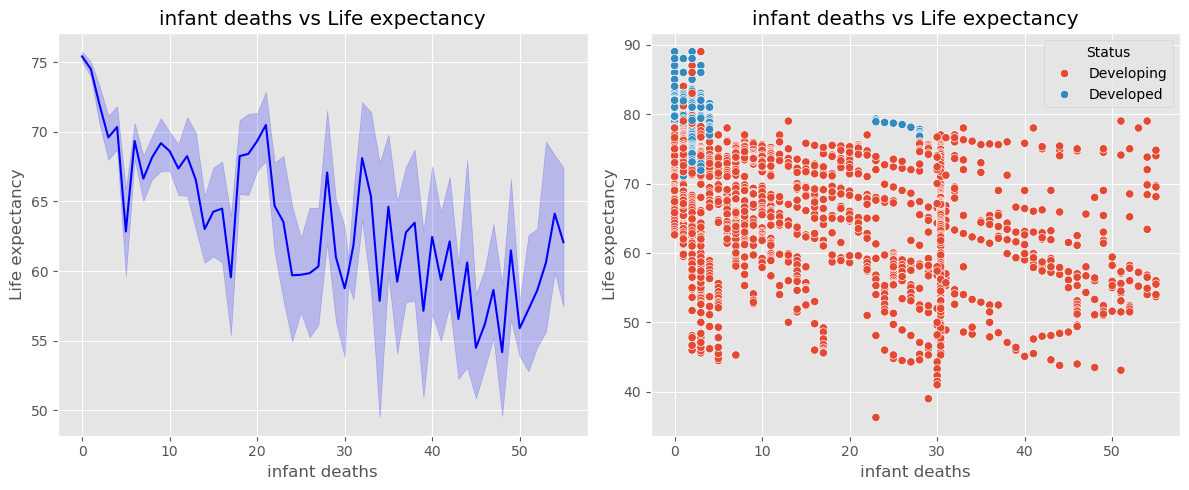

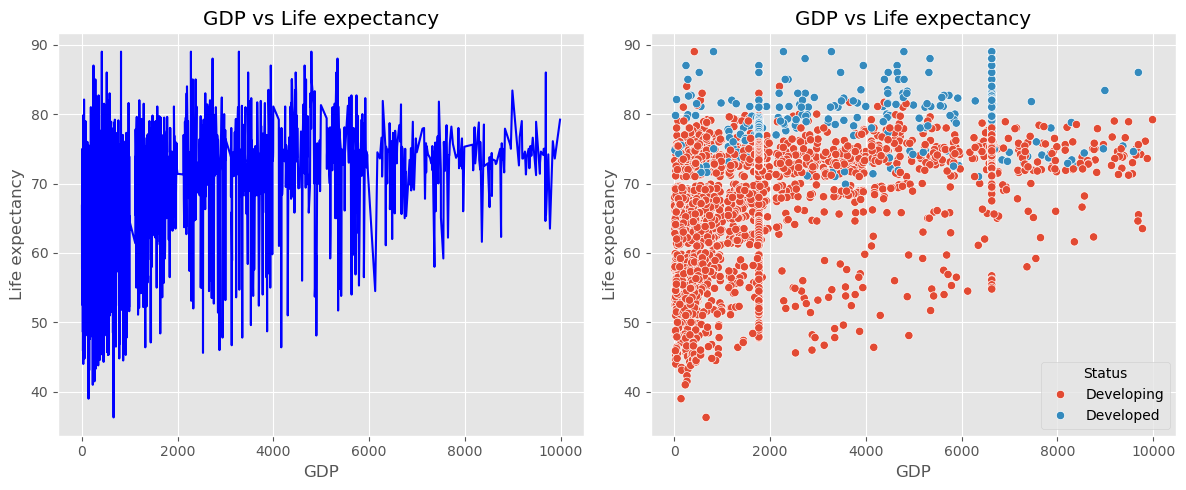

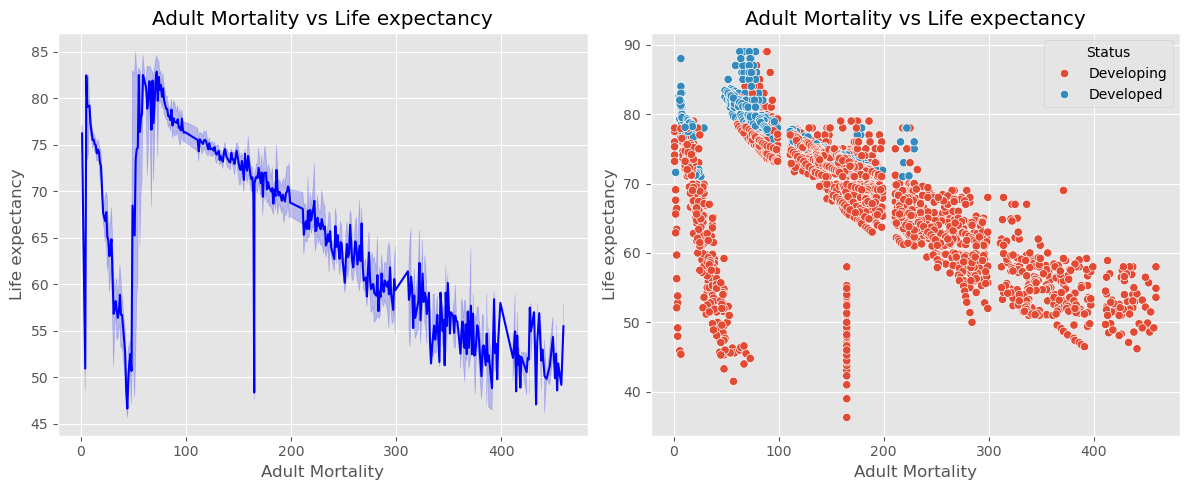

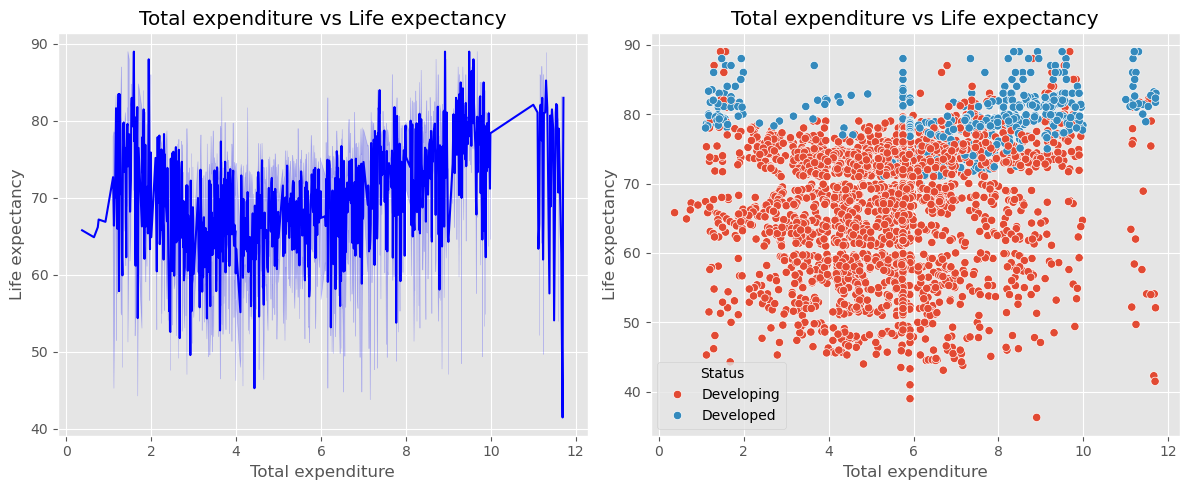

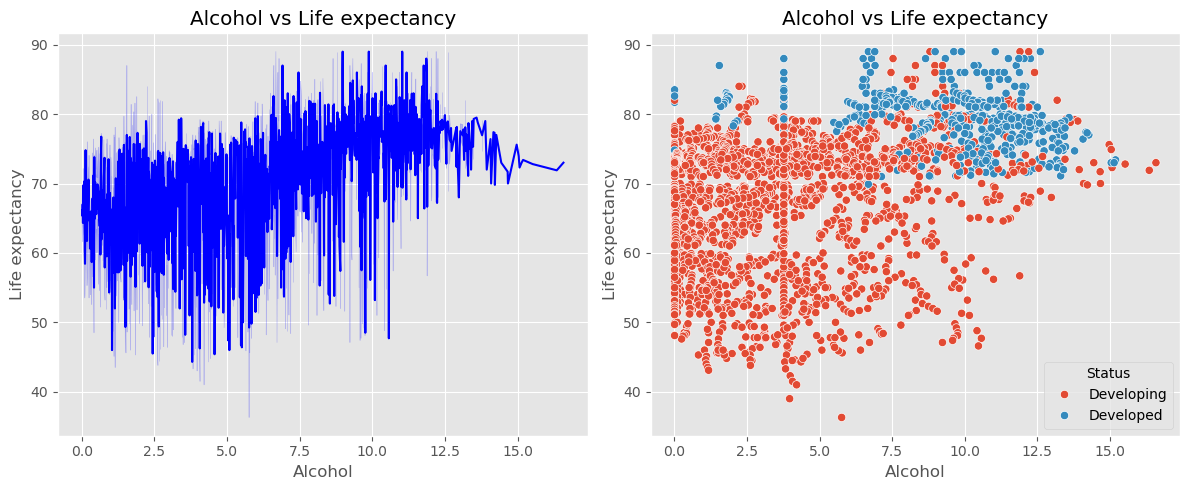

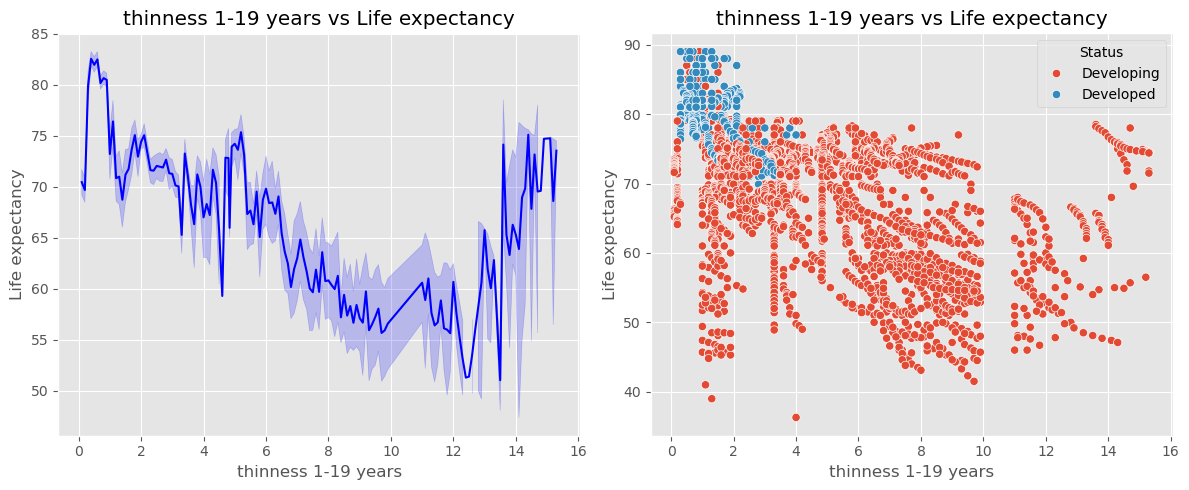

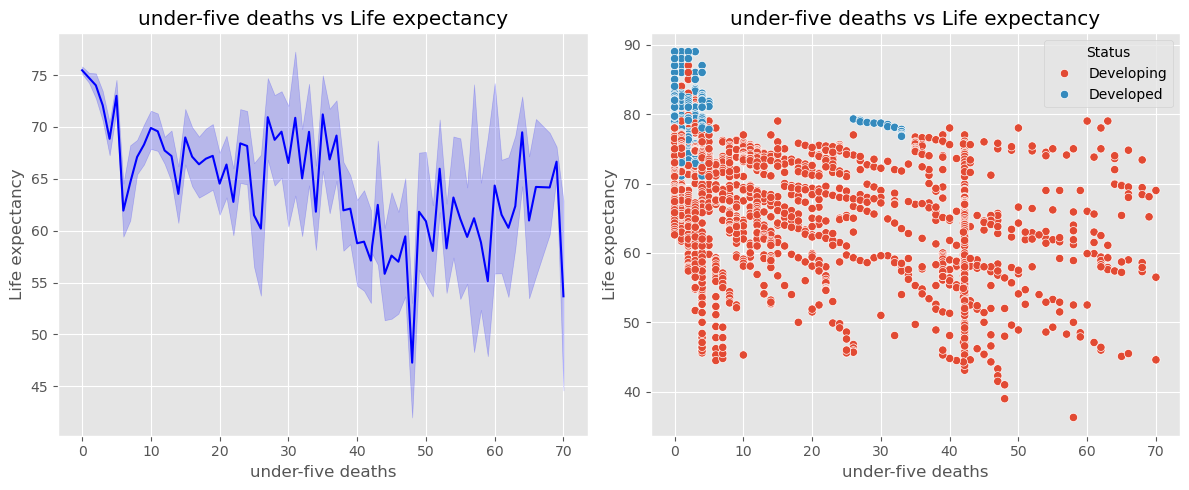

In [38]:
variables = ['Diphtheria', 'Polio','HIV/AIDS','Hepatitis B',
             'Schooling','Income composition of resources',
             'infant deaths','GDP','Adult Mortality','Total expenditure'
             ,'Alcohol','thinness 1-19 years','under-five deaths']
plot_line_and_scatter(x_vars=variables)

### Observation
> 1. Analysis reveals a strong positive correlation between childhood immunization rates (diphtheria and polio) and national life expectancy figures. This relationship is particularly evident when comparing developed nations (with vaccination rates typically exceeding 90% and life expectancies above 80 years) against developing countries (where lower vaccination coverage correlates with life expectancies often below 70 years

##### Closing the immunization gap in the 10 worst-performing nations could prevent more than 1M child deaths/year, adding ~5 years to their average life expectancy within a decades.

> 2. There is a strong positive correlation between a country's average years of schooling and its life expectancy. Countries with higher education levels (14+ years) typically have life expectancies above 75 years, while those with <12 years of schooling average <70 years.
> 3. There is a strong positive correlation between a nation's income/resource composition and its life expectancy. Wealthier nations (higher GDP per capita) and those with equitable resource distribution consistently exhibit higher life expectancy.

##### A dual focus on education (especially for women) and equitable resource distribution could close the life expectancy gap between developed and developing nations.

> 4. There is a strong negative correlation between HIV/AIDS prevalence and life expectancy. The data shows Low HIV/AIDS rates (0 deaths per 1,000 live births): Life expectancy ~75 years and High HIV/AIDS rates (2.0 deaths per 1,000 live births): Life expectancy drops sharply to ~55 years.
> 5. A 1.0 increase in HIV/AIDS deaths (per 1,000 live births) corresponds with a ~10-year decline in life expectancy

##### Eliminating mother-to-child HIV transmission in high-burden countries could increase national life expectancy

In [39]:
# Removing the column

df1 = df1.drop('Country', axis =1)

In [40]:
# Dummy variables

dummy = pd.get_dummies(df[['Status']], drop_first = True, dtype = int)

df1 = pd.concat([df1, dummy], axis = 1)
df1 = df1.drop(['Status'], axis = 1)

df1 = df1.dropna()

df1.head()

Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015.0             65.0            263.0      30.407445     0.01   
1  2014.0             59.9            271.0      30.407445     0.01   
2  2013.0             59.9            268.0      30.407445     0.01   
3  2012.0             59.5            272.0      30.407445     0.01   
4  2011.0             59.2            275.0      30.407445     0.01   

   percentage expenditure  Hepatitis B      Measles   BMI  under-five deaths  \
0               71.279624         65.0  2427.855874  19.1          42.179303   
1               73.523582         62.0   492.000000  18.6          42.179303   
2               73.219243         64.0   430.000000  18.1          42.179303   
3               78.184215         67.0  2427.855874  17.6          42.179303   
4                7.097109         68.0  2427.855874  17.2          42.179303   

       Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0  82.655055               8.16        65.0       0.1  584.259210   
1  58.000000               8.18        62.0       0.1  612.696514   
2  62.000000               8.13        64.0       0.1  631.744976   
3  67.000000               8.52        67.0       0.1  669.959000   
4  68.000000               7.87        68.0       0.1   63.537231   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0             4.833675            4.865232                            0.479   
1             4.833675            4.865232                            0.476   
2             4.833675            4.865232                            0.470   
3             4.833675            4.865232                            0.463   
4             4.833675            4.865232                            0.454   

   Schooling  Status_Developing  
0       10.1                  1  
1       10.0                  1  
2        9.9                  1  
3        9.8                  1  
4        9.5                  1

In [41]:
df1.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [42]:
numeric_columns = df1.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Correlation

In [43]:
corr = df1[numeric_columns].corr()
corr

Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.170033        -0.028907   
Life expectancy                  0.170033         1.000000        -0.594867   
Adult Mortality                 -0.028907        -0.594867         1.000000   
infant deaths                   -0.032873        -0.574799         0.375502   
Alcohol                         -0.066847         0.391483        -0.210846   
percentage expenditure           0.038391         0.475629        -0.314835   
Hepatitis B                     -0.081011         0.215748        -0.169416   
Measles                         -0.133098        -0.313349         0.193202   
BMI                              0.104057         0.558888        -0.378375   
under-five deaths               -0.046662        -0.600349         0.384189   
Polio                            0.106247         0.540304        -0.331744   
Total expenditure                0.065313         0.229477        -0.163501   
Diphtheria                       0.119761         0.538189        -0.321874   
HIV/AIDS                        -0.085943        -0.796341         0.525173   
GDP                              0.161759         0.524044        -0.320400   
thinness 1-19 years             -0.044535        -0.552990         0.343888   
thinness 5-9 years              -0.040012        -0.547954         0.348202   
Income composition of resources  0.136164         0.827501        -0.513471   
Schooling                        0.164553         0.719856        -0.440655   

                                 infant deaths   Alcohol  \
Year                                 -0.032873 -0.066847   
Life expectancy                      -0.574799  0.391483   
Adult Mortality                       0.375502 -0.210846   
infant deaths                         1.000000 -0.349425   
Alcohol                              -0.349425  1.000000   
percentage expenditure               -0.350967  0.371048   
Hepatitis B                          -0.270423  0.189423   
Measles                               0.495305 -0.173922   
BMI                                  -0.421227  0.319693   
under-five deaths                     0.968729 -0.355192   
Polio                                -0.407866  0.272788   
Total expenditure                    -0.147220  0.322487   
Diphtheria                           -0.422716  0.297541   
HIV/AIDS                              0.427601 -0.195209   
GDP                                  -0.379515  0.379922   
thinness 1-19 years                   0.401639 -0.410632   
thinness 5-9 years                    0.404020 -0.404659   
Income composition of resources      -0.566587  0.505540   
Schooling                            -0.518222  0.519289   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.038391    -0.081011   
Life expectancy                                0.475629     0.215748   
Adult Mortality                               -0.314835    -0.169416   
infant deaths                                 -0.350967    -0.270423   
Alcohol                                        0.371048     0.189423   
percentage expenditure                         1.000000     0.150637   
Hepatitis B                                    0.150637     1.000000   
Measles                                       -0.193809    -0.149103   
BMI                                            0.330860     0.130528   
under-five deaths                             -0.369644    -0.271799   
Polio                                          0.266507     0.500863   
Total expenditure                              0.207763     0.078477   
Diphtheria                                     0.285392     0.546611   
HIV/AIDS                                      -0.294275    -0.144910   
GDP                                            0.813481     0.185269   
thinness 1-19 years                           -0.309419    -0.076968   
thinness 5-9 years             

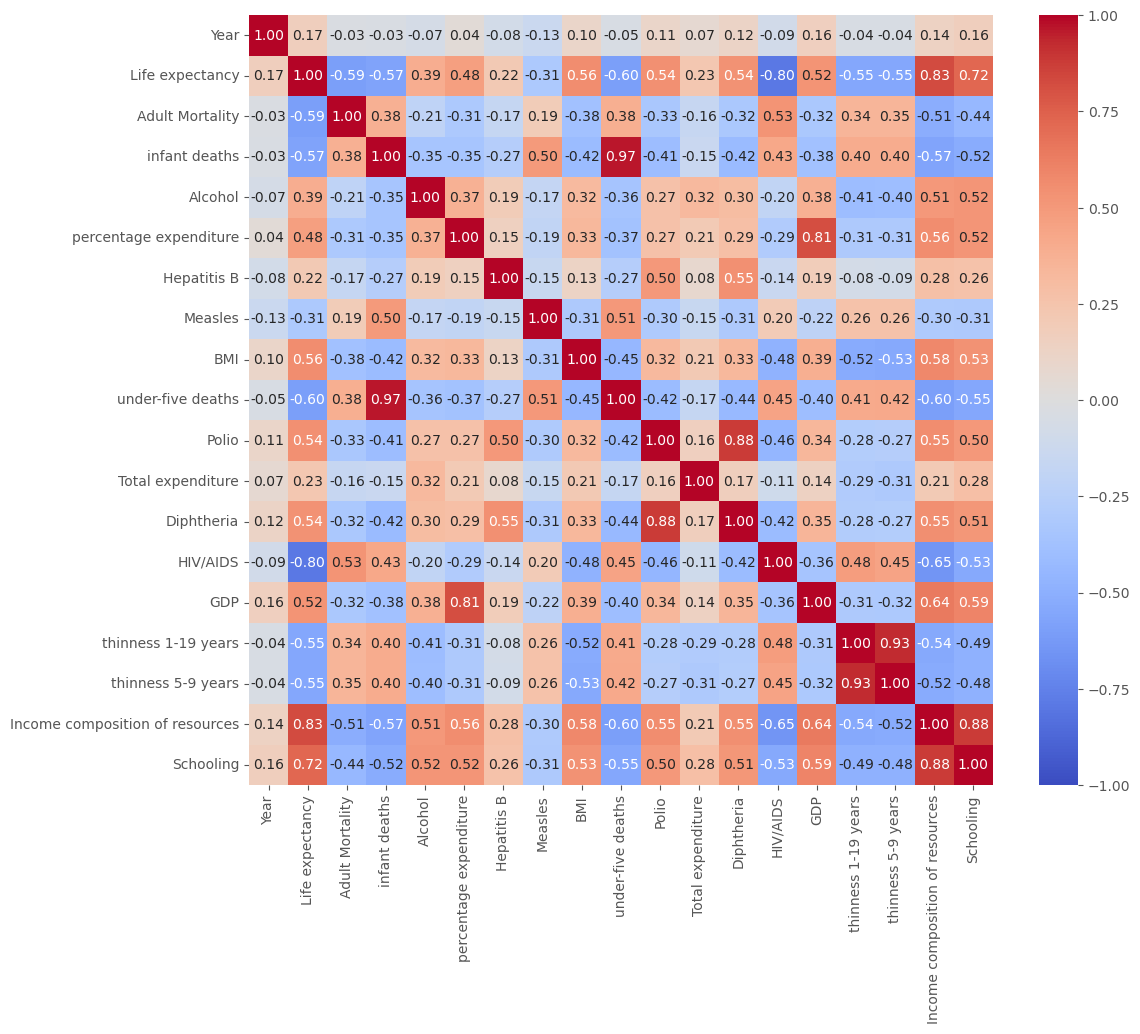

In [44]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'coolwarm', vmin = -1, vmax = +1)
plt.show()

## Statistical Analysis

### Correlation between life expectancy and key indicators

In [45]:
# Calculate Pearson correlation matrix
corr_matrix = df1.corr(method='pearson')

# Focus on life expectancy correlations
life_expectancy_corr = corr_matrix['Life expectancy'].sort_values(ascending=False)

print("Top Correlations with Life Expectancy:")
print(life_expectancy_corr)

Top Correlations with Life Expectancy:
Life expectancy                    1.000000
Income composition of resources    0.827501
Schooling                          0.719856
BMI                                0.558888
Polio                              0.540304
Diphtheria                         0.538189
GDP                                0.524044
percentage expenditure             0.475629
Alcohol                            0.391483
Total expenditure                  0.229477
Hepatitis B                        0.215748
Year                               0.170033
Measles                           -0.313349
Status_Developing                 -0.482136
thinness 5-9 years                -0.547954
thinness 1-19 years               -0.552990
infant deaths                     -0.574799
Adult Mortality                   -0.594867
under-five deaths                 -0.600349
HIV/AIDS                          -0.796341
Name: Life expectancy, dtype: float64


The correlation analysis reveals that life expectancy is most strongly influenced by income distribution and healthcare access (0.83), followed closely by education levels (0.72), demonstrating that equitable resource allocation and knowledge empowerment are foundational for longevity. Preventative health measures like polio and diphtheria vaccinations (both 0.54) show significant positive impacts, while HIV/AIDS presents the strongest negative correlation (-0.80), devastating populations in high-prevalence regions. Childhood factors like under-five mortality (-0.60) and malnutrition (-0.55) emerge as critical drags on life expectancy, suggesting that early-life interventions could yield disproportionate gains. Interestingly, moderate BMI (0.56) and controlled alcohol consumption (0.39) in developed nations correlate positively with lifespan

## Hypothesis Testing



#### Is there a significant difference in life expectancy between high-income and low-income countries?

In [46]:
# # Using median GDP to split (adjust threshold as needed)
median_gdp = df1['GDP'].median()
df1['Income_Group'] = np.where(df1['GDP'] >= median_gdp, 'High', 'Low')

high_income = df1[df1['Income_Group'] == 'High']['Life expectancy']
low_income = df1[df1['Income_Group'] == 'Low']['Life expectancy']

t_stat, p_value = stats.ttest_ind(high_income, low_income)

print(f'T-test between High and Low Income Countries: t-statistic={t_stat:.2f},p-value={p_value:.2f}')

if p_value < 0.05:
    print("The difference in life expectancy between high-income and low-income countries is statistically significant.")
else:
    print("There is no statistically significant difference in life expectancy betweenhigh-income and low-income countries.")


T-test between High and Low Income Countries: t-statistic=28.32,p-value=0.00
The difference in life expectancy between high-income and low-income countries is statistically significant.


#### Is there a significant difference in life expectancy between countries spending more or less on healthcare?

In [47]:
median_expenditure = df1['percentage expenditure'].median()
df1['Expenditure_Group'] = np.where(df1['percentage expenditure'] >= median_expenditure, 'High', 'Low')

high_exp_life = df1[df1['Expenditure_Group'] == 'High']['Life expectancy']
low_exp_life = df1[df1['Expenditure_Group'] == 'Low']['Life expectancy']

t_stat, p_value = stats.ttest_ind(high_exp_life, low_exp_life)

print(f'T-test between High and Low health expenditure Countries: t-statistic={t_stat:.2f},p-value={p_value:.2f}')

if p_value < 0.05:
    print("The difference in life expectancy between high-health expenditure and low-health expenditure countries is statistically significant.")
else:
    print("There is no statistically significant difference in life expectancy between high-health expenditure and low-health expenditure countries.")

T-test between High and Low health expenditure Countries: t-statistic=23.45,p-value=0.00
The difference in life expectancy between high-health expenditure and low-health expenditure countries is statistically significant.


In [48]:
df1 = df1.drop(['Income_Group','Expenditure_Group'], axis = 1)

#### Splitting the dataset 

In [49]:
y = df1['Life expectancy']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [50]:
X = df1.drop(['Life expectancy'], axis = 1)
X.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015.0            263.0      30.407445     0.01               71.279624   
1  2014.0            271.0      30.407445     0.01               73.523582   
2  2013.0            268.0      30.407445     0.01               73.219243   
3  2012.0            272.0      30.407445     0.01               78.184215   
4  2011.0            275.0      30.407445     0.01                7.097109   

   Hepatitis B      Measles   BMI  under-five deaths      Polio  \
0         65.0  2427.855874  19.1          42.179303  82.655055   
1         62.0   492.000000  18.6          42.179303  58.000000   
2         64.0   430.000000  18.1          42.179303  62.000000   
3         67.0  2427.855874  17.6          42.179303  67.000000   
4         68.0  2427.855874  17.2          42.179303  68.000000   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  thinness 1-19 years  \
0               8.16        65.0       0.1  584.259210             4.833675   
1               8.18        62.0       0.1  612.696514             4.833675   
2               8.13        64.0       0.1  631.744976             4.833675   
3               8.52        67.0       0.1  669.959000             4.833675   
4               7.87        68.0       0.1   63.537231             4.833675   

   thinness 5-9 years  Income composition of resources  Schooling  \
0            4.865232                            0.479       10.1   
1            4.865232                            0.476       10.0   
2            4.865232                            0.470        9.9   
3            4.865232                            0.463        9.8   
4            4.865232                            0.454        9.5   

   Status_Developing  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

### Train Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling

In [52]:
numeric_columns = X_train.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

## Building a linear model

In [53]:
logm1 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     572.3
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:03   Log-Likelihood:                -5616.2
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2029   BIC:                         1.138e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8                 under-five deaths  19.75
2                     infant deaths  18.27
16  Income composition of resources   7.59
14              thinness 1-19 years   7.49
15               thinness 5-9 years   7.41
11                       Diphtheria   5.30
9                             Polio   5.15
17                        Schooling   4.92
13                              GDP   3.62
4            percentage expenditure   3.17
12                         HIV/AIDS   2.20
7                               BMI   1.77
3                           Alcohol   1.69
5                       Hepatitis B   1.62
1                   Adult Mortality   1.54
6                           Measles   1.48
10                Total expenditure   1.24
0                              Year   1.17
18                Status_Developing   1.09

In [55]:
X_train = X_train.drop('infant deaths', axis = 1)

In [56]:
#  Rebuilding the model

logm2 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     604.3
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -5616.3
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2030   BIC:                         1.138e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15  Income composition of resources  7.59
13              thinness 1-19 years  7.47
14               thinness 5-9 years  7.41
10                       Diphtheria  5.30
8                             Polio  5.15
16                        Schooling  4.91
12                              GDP  3.62
3            percentage expenditure  3.17
11                         HIV/AIDS  2.19
7                 under-five deaths  2.13
6                               BMI  1.77
2                           Alcohol  1.68
4                       Hepatitis B  1.61
1                   Adult Mortality  1.54
5                           Measles  1.48
9                 Total expenditure  1.24
0                              Year  1.17
17                Status_Developing  1.09

In [58]:
X_train = X_train.drop('BMI', axis = 1)

In [59]:
logm3 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     640.2
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -5616.4
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2031   BIC:                         1.137e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12              thinness 1-19 years  7.47
14  Income composition of resources  7.47
13               thinness 5-9 years  7.32
9                        Diphtheria  5.30
7                             Polio  5.13
15                        Schooling  4.91
11                              GDP  3.61
3            percentage expenditure  3.17
10                         HIV/AIDS  2.18
6                 under-five deaths  2.13
2                           Alcohol  1.68
4                       Hepatitis B  1.61
1                   Adult Mortality  1.53
5                           Measles  1.47
8                 Total expenditure  1.23
0                              Year  1.17
16                Status_Developing  1.09

In [61]:
X_train = X_train.drop('Polio', axis = 1)

In [62]:
logm4 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     680.0
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -5617.0
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2032   BIC:                         1.136e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11              thinness 1-19 years  7.47
13  Income composition of resources  7.38
12               thinness 5-9 years  7.32
14                        Schooling  4.91
10                              GDP  3.61
3            percentage expenditure  3.16
9                          HIV/AIDS  2.16
6                 under-five deaths  2.13
8                        Diphtheria  2.09
2                           Alcohol  1.68
4                       Hepatitis B  1.60
1                   Adult Mortality  1.53
5                           Measles  1.47
7                 Total expenditure  1.23
0                              Year  1.17
15                Status_Developing  1.09

In [64]:
X_train = X_train.drop('thinness 1-19 years', axis = 1)

In [65]:
logm5 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     723.6
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -5619.4
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2033   BIC:                         1.136e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  Income composition of resources  7.35
13                        Schooling  4.90
10                              GDP  3.60
3            percentage expenditure  3.15
6                 under-five deaths  2.12
9                          HIV/AIDS  2.12
8                        Diphtheria  2.09
2                           Alcohol  1.67
11               thinness 5-9 years  1.61
4                       Hepatitis B  1.59
1                   Adult Mortality  1.53
5                           Measles  1.46
7                 Total expenditure  1.23
0                              Year  1.17
14                Status_Developing  1.09

In [67]:
X_train = X_train.drop('Alcohol', axis = 1)

In [68]:
X_train = X_train.drop('Schooling', axis = 1)

In [69]:
logm6 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm6.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     832.6
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:04   Log-Likelihood:                -5622.8
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2035   BIC:                         1.135e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11  Income composition of resources  3.68
9                               GDP  3.59
2            percentage expenditure  3.15
5                 under-five deaths  2.12
7                        Diphtheria  2.09
8                          HIV/AIDS  2.02
3                       Hepatitis B  1.59
10               thinness 5-9 years  1.57
1                   Adult Mortality  1.53
4                           Measles  1.46
6                 Total expenditure  1.16
0                              Year  1.13
12                Status_Developing  1.07

In [71]:
X_train = X_train.drop('Measles', axis = 1)

In [72]:
logm7 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     901.6
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:05   Log-Likelihood:                -5623.5
No. Observations:                2049   AIC:                         1.127e+04
Df Residuals:                    2036   BIC:                         1.135e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10  Income composition of resources  3.67
8                               GDP  3.59
2            percentage expenditure  3.15
6                        Diphtheria  2.07
7                          HIV/AIDS  2.01
4                 under-five deaths  1.74
3                       Hepatitis B  1.59
9                thinness 5-9 years  1.56
1                   Adult Mortality  1.52
5                 Total expenditure  1.15
0                              Year  1.11
11                Status_Developing  1.07

In [74]:
X_train = X_train.drop('Total expenditure', axis = 1)

In [75]:
logm8 = sm.OLS(y_train,(sm.add_constant(X_train))).fit()
print(logm8.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     980.9
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:05   Log-Likelihood:                -5626.3
No. Observations:                2049   AIC:                         1.128e+04
Df Residuals:                    2037   BIC:                         1.134e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   Income composition of resources  3.67
7                               GDP  3.57
2            percentage expenditure  3.10
5                        Diphtheria  2.06
6                          HIV/AIDS  2.00
4                 under-five deaths  1.74
3                       Hepatitis B  1.59
1                   Adult Mortality  1.52
8                thinness 5-9 years  1.47
0                              Year  1.11
10                Status_Developing  1.06

In [77]:
X_train = X_train.drop('Hepatitis B', axis = 1)

In [78]:
X_train_sm = sm.add_constant(X_train)
logm_f = sm.OLS(y_train,X_train_sm).fit()
print(logm_f.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1075.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:37:05   Log-Likelihood:                -5630.2
No. Observations:                2049   AIC:                         1.128e+04
Df Residuals:                    2038   BIC:                         1.134e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8  Income composition of resources  3.67
6                              GDP  3.56
2           percentage expenditure  3.09
5                         HIV/AIDS  1.97
3                under-five deaths  1.73
1                  Adult Mortality  1.52
4                       Diphtheria  1.50
7               thinness 5-9 years  1.46
0                             Year  1.07
9                Status_Developing  1.06

In [80]:
# Predicting the y_train 

y_train_pred = logm_f.predict(X_train_sm)

In [81]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

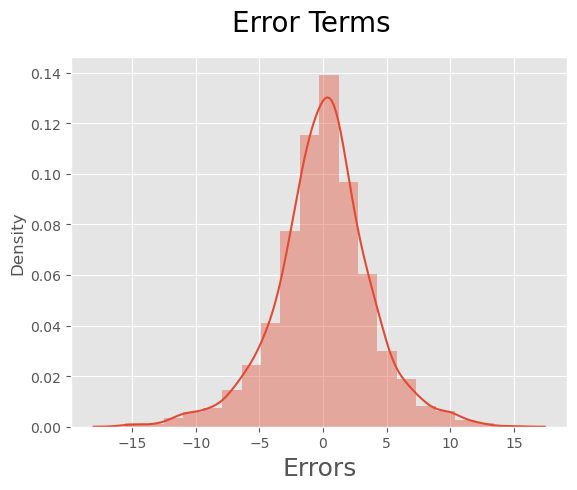

In [82]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Making Predictions Using the Final Model

In [83]:
X_test.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2399  2009.0            449.0      46.000000     7.60              782.598714   
196   2011.0             14.0      30.407445     0.01               62.349885   
2316  2012.0             59.0       0.000000     1.89              740.321185   
1735  2012.0             11.0       0.000000     0.01              648.133178   
1102  2003.0             38.0       5.000000     2.16                2.527115   

      Hepatitis B      Measles   BMI  under-five deaths  Polio  \
2399    74.000000  2427.855874  46.4          70.000000   75.0   
196     96.000000  2427.855874  15.8          42.179303   96.0   
2316    97.000000    42.000000  32.4           0.000000   97.0   
1735    84.367828     0.000000   6.2           0.000000   94.0   
1102    99.000000  2427.855874  19.0           8.000000   65.0   

      Total expenditure  Diphtheria  HIV/AIDS          GDP  \
2399               8.39   76.000000  1.747712  5888.628400   
196                3.16   96.000000  0.100000   835.789341   
2316               4.22   97.000000  0.100000  6627.389707   
1735               7.25   94.000000  0.100000  6586.719290   
1102               5.62   82.429645  1.747712    36.571858   

      thinness 1-19 years  thinness 5-9 years  \
2399             8.100000            9.800000   
196              4.833675            4.865232   
2316             2.200000            2.100000   
1735             1.900000            1.900000   
1102             9.600000            9.500000   

      Income composition of resources  Schooling  Status_Developing  
2399                         0.622000       12.8                  1  
196                          0.545000        9.4                  1  
2316                         0.917000       15.4                  0  
1735                         0.797000       15.1                  1  
1102                         0.630128        7.4                  1

In [84]:
numeric_columns = X_test.select_dtypes(include=['float64','int64']).columns

X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])

In [85]:
X_test_sm = sm.add_constant(X_test)

In [86]:
X_test_sm = X_test_sm.drop(['Polio','BMI','infant deaths','Schooling','Hepatitis B','thinness 1-19 years','Total expenditure','Alcohol','Measles'],axis = 1)
X_test_sm.head()

const      Year  Adult Mortality  percentage expenditure  \
2399    1.0  0.354770         2.772888                1.848478   
196     1.0  0.793676        -1.328057               -0.573804   
2316    1.0  1.013129        -0.903821                1.706294   
1735    1.0  1.013129        -1.356339                1.396255   
1102    1.0 -0.961948        -1.101798               -0.774995   

      under-five deaths  Diphtheria  HIV/AIDS       GDP  thinness 5-9 years  \
2399           3.016540   -1.237208   1.80858  1.212439            1.573709   
196            1.505171    0.682107  -0.64606 -0.769420            0.119272   
2316          -0.786236    0.778073  -0.64606  1.502201           -0.695732   
1735          -0.786236    0.490175  -0.64606  1.486249           -0.754679   
1102          -0.351633   -0.620183   1.80858 -1.082894            1.485290   

      Income composition of resources  Status_Developing  
2399                        -0.264438                  1  
196                         -0.778824                  1  
2316                         1.706262                  0  
1735                         0.904621                  1  
1102                        -0.210139                  1

In [87]:
y_test_pred = logm_f.predict(X_test_sm)

In [88]:
mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_test_pred)
print(f"R²: {r2:.2f}")

mae = mean_absolute_error(y_test, y_test_pred)
print(f"MAE: {mae:.2f}")

MSE: 16.52
RMSE: 4.06
R²: 0.82
MAE: 3.03


Text(0, 0.5, 'y_pred')

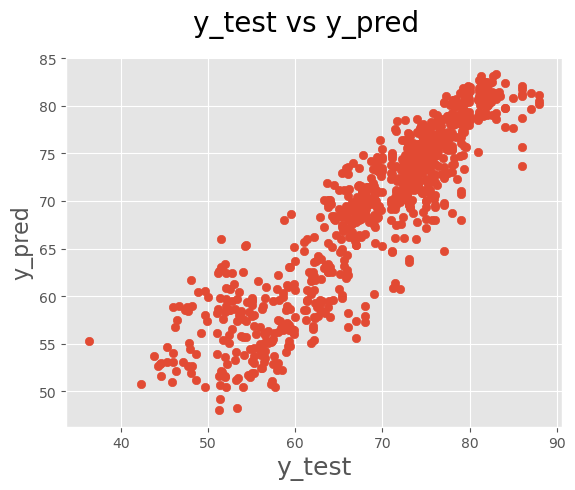

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

Text(0.5, 0, 'Errors')

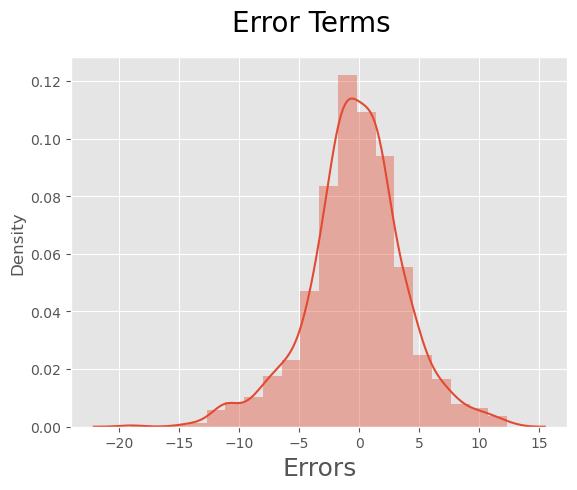

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 